In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate,optimize, fftpack
from scipy.integrate import odeint

In [76]:
cases=pd.read_excel('Nl_Ger.xlsx')
cases.replace(np.NaN,0)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_infected,total_deaths,new_deaths,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 42,total infected,Recovered
0,DEU,Europe,Germany,2019-12-31,0.0,0,0.000,0.000,0.0,0,...,8.31,28.2,33.1,0.0,8.00,81.33,0.936,0.0,0.0,0.0
1,DEU,Europe,Germany,2020-01-01,0.0,0,0.000,0.000,0.0,0,...,8.31,28.2,33.1,0.0,8.00,81.33,0.936,0.0,0.0,0.0
2,DEU,Europe,Germany,2020-01-02,0.0,0,0.000,0.000,0.0,0,...,8.31,28.2,33.1,0.0,8.00,81.33,0.936,0.0,0.0,0.0
3,DEU,Europe,Germany,2020-01-03,0.0,0,0.000,0.000,0.0,0,...,8.31,28.2,33.1,0.0,8.00,81.33,0.936,0.0,0.0,0.0
4,DEU,Europe,Germany,2020-01-04,0.0,0,0.000,0.000,0.0,0,...,8.31,28.2,33.1,0.0,8.00,81.33,0.936,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,NLD,Europe,Netherlands,2020-10-18,219795.0,8105,7387.571,55663.714,6728.0,29,...,5.29,24.4,27.3,0.0,3.32,82.28,0.931,0.0,75941.0,144838.0
590,NLD,Europe,Netherlands,2020-10-19,228234.0,8439,7683.429,58518.143,6751.0,23,...,5.29,24.4,27.3,0.0,3.32,82.28,0.931,0.0,79474.0,149817.0
591,NLD,Europe,Netherlands,2020-10-20,235954.0,7720,7808.571,61136.285,6759.0,8,...,5.29,24.4,27.3,0.0,3.32,82.28,0.931,0.0,83396.0,155630.0
592,NLD,Europe,Netherlands,2020-10-21,244103.0,8149,7920.143,63527.714,6804.0,45,...,5.29,24.4,27.3,0.0,3.32,82.28,0.931,0.0,86137.0,161589.0


In [77]:
nedgov = pd.read_csv('NED_GOV.csv', sep=',')
gergov = pd.read_csv('GER_GOV.csv', sep=',')

In [78]:
gercases = cases.iloc[0:297,5]/83
nedcases = cases.iloc[297:,5]/16
dates = cases.iloc[0:297,3]

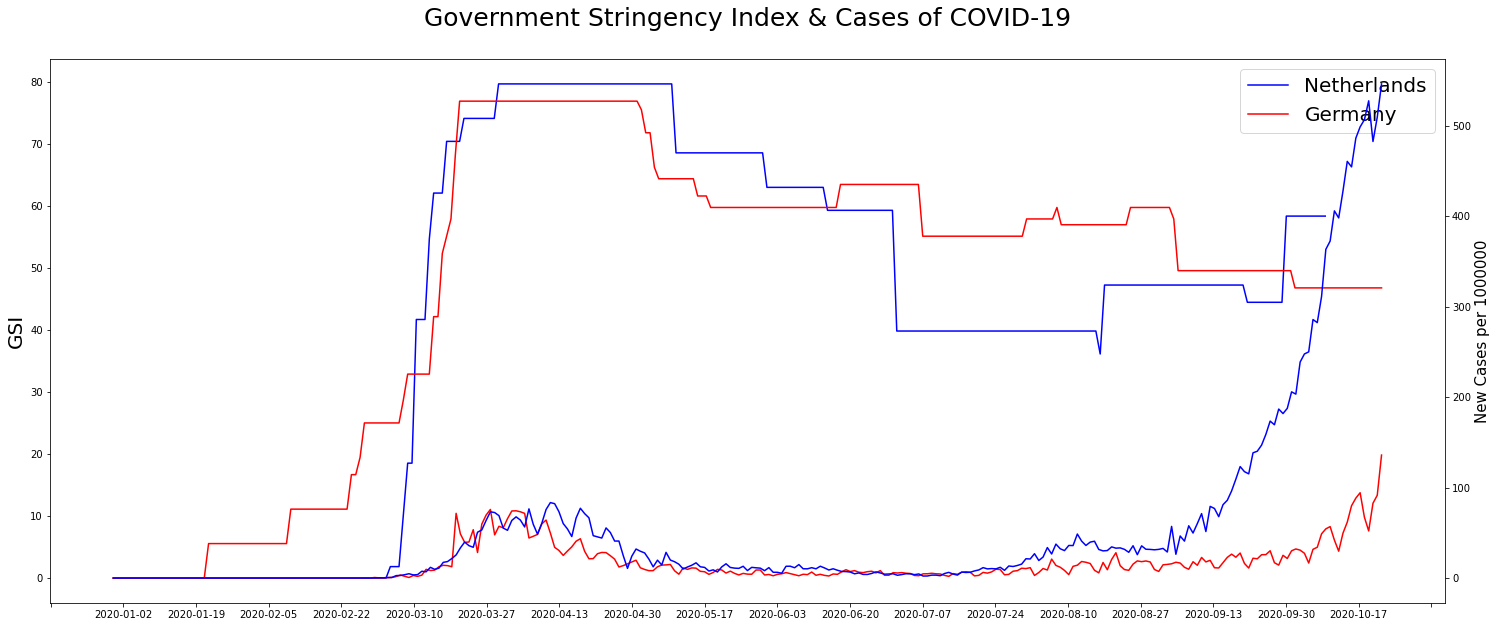

In [79]:
fig = plt.figure(figsize = (25,10))
ax=fig.add_subplot(111, label="1")
#ax.set_title("Government Stringency Index")
ax.plot(nedgov['2020-01-01'],nedgov['0'],'b',label = "Netherlands")
ax.plot(gergov['2020-01-01'],gergov['0'],'r',label = "Germany")
ax.set_ylabel("GSI", size = 20)
ax2 = fig.add_subplot(111, label ="2", frame_on = False)
ax2.plot(dates,gercases,'r')
ax2.plot(dates,nedcases,'b')
ax2.set_ylabel("New Cases per 1000000", size = 15)
ax2.yaxis.set_label_position('right')
ax2.set_xticks([])
ax2.yaxis.tick_right()
ax.set_xticks([])
ax.legend(fontsize = 20)
xmin, xmax = ax.get_xlim()
plt.title("Government Stringency Index & Cases of COVID-19", size = 25, y=1.05)
plt.xticks(rotation = 70)
plt.xticks(np.round(np.linspace(xmin,xmax,20),2))
plt.show()